In [1]:
# %pip install git+https://github.com/facebookresearch/segment-anything.git

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
from segment_anything import SamAutomaticMaskGenerator, SamPredictor, sam_model_registry

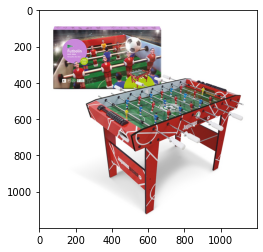

In [15]:
imagen = cv2.imread('personas.jpg')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

plt.imshow(imagen)

In [4]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [17]:
image = cv2.imread('personas.jpg')
image = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
checkpoint = 'sam_vit_h_4b8939.pth'
model_type = 'vit_h'
sam = sam_model_registry[model_type](checkpoint=checkpoint)
mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=64,
    points_per_batch=64,
    pred_iou_thresh=0.9,
    stability_score_thresh=0.95,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=100,  # Requires open-cv to run post-processing
    )
masks = mask_generator.generate(image)

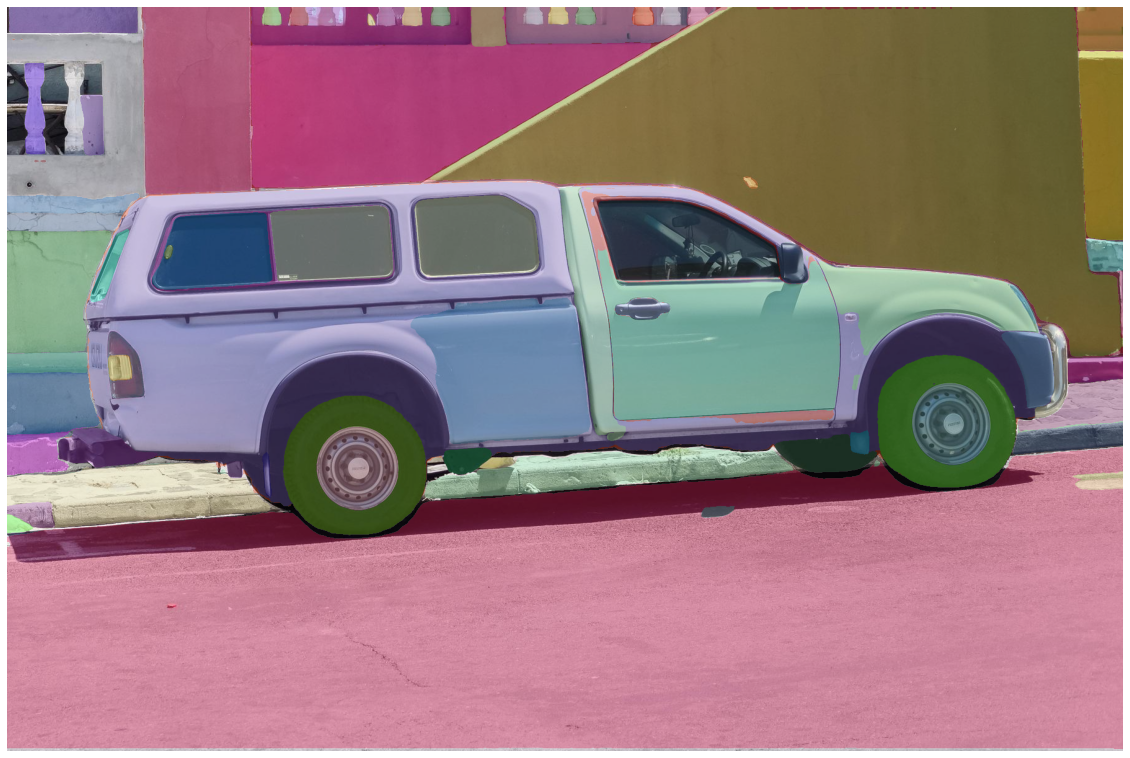

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 